In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np

In [2]:
competence = pickle.load(open( '../00_data/final/competence.pkl','rb') )
dropout = pickle.load(open( '../00_data/final/dropout_per_session.pkl','rb') )
mistakes = pickle.load(open( '../00_data/final/incorrect_answers.pkl','rb') )

dropout = dropout.drop(columns=['Geschlecht','Klassenstufe','interventiongroup'])
dropout = dropout[['UserID','dropout']]
dropout = dropout.drop_duplicates()

In [3]:
## Korrelation zwischen Mistakes und Dropout
final = pd.merge(mistakes, dropout, on='UserID', how='inner')
final = final[['interventiongroup','prop_fehler','dropout']]

intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

li = [final, intvcontrol, intv2, intv3, intv4, intv5, intv6]
for x in li:
    print(np.corrcoef(x.dropout, x.prop_fehler))
    print('--------------------------')



[[1.         0.22312644]
 [0.22312644 1.        ]]
--------------------------
[[1.         0.21542781]
 [0.21542781 1.        ]]
--------------------------
[[1.         0.20120584]
 [0.20120584 1.        ]]
--------------------------
[[1.         0.24968075]
 [0.24968075 1.        ]]
--------------------------
[[1.         0.26187981]
 [0.26187981 1.        ]]
--------------------------
[[1.         0.23345104]
 [0.23345104 1.        ]]
--------------------------
[[1.         0.16705963]
 [0.16705963 1.        ]]
--------------------------


In [13]:
## Korrelation zwischen Kompetenz und Dropout
competence_1 = competence.drop(columns=['Geschlecht','Klassenstufe'])
final = pd.merge(competence_1, dropout, on='UserID', how='inner')
final = final[['interventiongroup','ability','dropout']]

intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

li = [final, intvcontrol, intv2, intv3, intv4, intv5, intv6]
for x in li:
    print(np.corrcoef(x.dropout, x.ability))
    print('--------------------------')


[[1.         0.15874566]
 [0.15874566 1.        ]]
--------------------------
[[1.         0.16429394]
 [0.16429394 1.        ]]
--------------------------
[[1.         0.16981209]
 [0.16981209 1.        ]]
--------------------------
[[1.         0.19787803]
 [0.19787803 1.        ]]
--------------------------
[[1.         0.16388638]
 [0.16388638 1.        ]]
--------------------------
[[1.        0.1257335]
 [0.1257335 1.       ]]
--------------------------
[[1.         0.13355308]
 [0.13355308 1.        ]]
--------------------------


In [4]:
## Korrelation zwischen Mistakes und Kompetenz
competence_1 = competence.drop(columns=['Geschlecht','Klassenstufe','interventiongroup'])
final = pd.merge(mistakes, competence_1, on='UserID', how='inner')
final = final[['interventiongroup','prop_fehler','ability']]

intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

li = [final, intvcontrol, intv2, intv3, intv4, intv5, intv6]
for x in li:
    print(np.corrcoef(x.ability, x.prop_fehler))
    print('--------------------------')



[[1.         0.12108302]
 [0.12108302 1.        ]]
--------------------------
[[1.         0.16148578]
 [0.16148578 1.        ]]
--------------------------
[[1.         0.09547607]
 [0.09547607 1.        ]]
--------------------------
[[1.         0.16986951]
 [0.16986951 1.        ]]
--------------------------
[[1.         0.12500697]
 [0.12500697 1.        ]]
--------------------------
[[1.         0.07611627]
 [0.07611627 1.        ]]
--------------------------
[[1.         0.08076847]
 [0.08076847 1.        ]]
--------------------------


AxesSubplot(0.125,0.125;0.775x0.755)


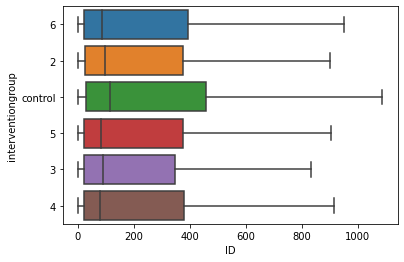

In [5]:
## Anzahl Sätze pro User und Interventionsgruppe
xmlsaetze = pickle.load(open( '../00_data/cleaned/xmlsaetze.pkl','rb') )
sitzungen = pickle.load(open( '../00_data/cleaned/sitzungssummary.pkl','rb') )
xmlsaetze = pd.merge(xmlsaetze, sitzungen, on='UserID', how='left')

cnt_saetze_pro_user = xmlsaetze.groupby(['UserID','interventiongroup']).agg({'ID':'count'}).reset_index()
final = cnt_saetze_pro_user[['ID','interventiongroup']]

print(sns.boxplot(x=final['ID'],y=final["interventiongroup"],showfliers = False))

In [6]:
# Korrelation Count of Sätze und Kompetenz
corr_2 = pd.merge(cnt_saetze_pro_user, competence_1, on='UserID')
print(np.corrcoef(corr_2.ID, corr_2.ability))

[[1.         0.33024322]
 [0.33024322 1.        ]]


AxesSubplot(0.125,0.125;0.775x0.755)


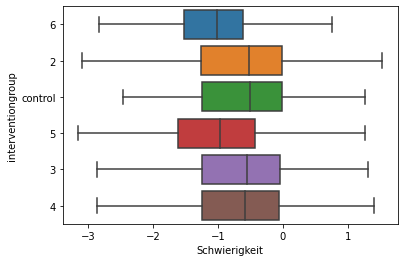

In [7]:
## Pro Interventionsgruppe Durchschnittliche Schwierigkeit
xmlsaetze = pickle.load(open( '../00_data/cleaned/xmlsaetze.pkl','rb') )
sitzungen = pickle.load(open( '../00_data/cleaned/sitzungssummary.pkl','rb') )
saetze = pickle.load(open( '../00_data/cleaned/saetze.pkl','rb') )
saetze = saetze[['satzID','Schwierigkeit']]
xmlsaetze = pd.merge(xmlsaetze, saetze, left_on='SatzID', right_on='satzID',how='left')
xmlsaetze = pd.merge(xmlsaetze, sitzungen, on='UserID', how='left')


diffic_pro_user = xmlsaetze.groupby(['UserID','interventiongroup']).agg({'Schwierigkeit':'mean'}).reset_index()
print(sns.boxplot(x=diffic_pro_user['Schwierigkeit'],y=diffic_pro_user["interventiongroup"],showfliers = False))

In [8]:
# Korrelation zwischen Schwierigkeit und Kompetenz
corr_2 = pd.merge(diffic_pro_user, competence_1, on='UserID')
print(np.corrcoef(corr_2.Schwierigkeit, corr_2.ability))

[[1.       0.738858]
 [0.738858 1.      ]]
